In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# sample_submission_df = pd.read_csv('./sample_submission.csv')
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [4]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [133]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Totalmoney        0
deck            199
number          199
side            199
dtype: int64

In [10]:
train_df[train_df['Age']]

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [3]:
Roommoney = train_df['RoomService'].mean()
Foodmoney = train_df['FoodCourt'].mean()
Shopmoney = train_df['ShoppingMall'].mean()
Spamoney = train_df['Spa'].mean()
Vrmoney = train_df['VRDeck'].mean()                           

In [5]:
train_df['RoomService'] = train_df['RoomService'].fillna(Roommoney)
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(Foodmoney)
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(Shopmoney)
train_df['Spa'] = train_df['Spa'].fillna(Spamoney)
train_df['VRDeck'] = train_df['VRDeck'].fillna(Vrmoney)

In [6]:
train_df['Totalmoney'] = train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']    

In [7]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Totalmoney
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [150]:
train_df[['Totalmoney','VIP']].groupby('VIP').mean()
# train_df[['Totalmoney','CryoSleep']].groupby('CryoSleep').mean()

,Totalmoney
VIP,
False,1403.367228
True,4457.424906


In [103]:
import seaborn as sns
import mat

<BarContainer object of 2 artists>

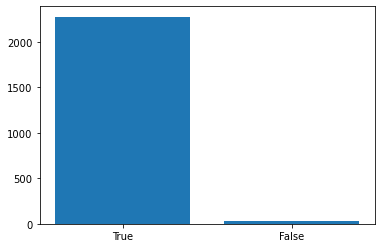

In [108]:
plt.bar(['True','False'],train_df.groupby('CryoSleep').Totalmoney.mean())

In [ ]:
plt.show()

In [8]:
train_df['deck'] = train_df.Cabin.str.split('/').str[0]
train_df['number'] = train_df.Cabin.str.split('/').str[1]
train_df['side'] = train_df.Cabin.str.split('/').str[2]
train_df## p 좌현 , s 우현

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Totalmoney,deck,number,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S


In [113]:
train_df.Transported.astype('int')

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [116]:
train_df[['Transported','side']].groupby('side').mean()

,Transported
side,
P,0.451260
S,0.555037


In [132]:
train_df[['Transported','deck']].groupby('deck').mean().sort_values(by='Transported')

,Transported
deck,
T,0.200000
E,0.357306
D,0.433054
F,0.439871
A,0.496094
G,0.516217
C,0.680054
B,0.734275


In [131]:
train_df[['Transported','number']].groupby('number').mean()

,Transported
number,
0,0.333333
1,0.666667
10,0.500000
100,0.583333
1000,0.500000
...,...
995,0.666667
996,1.000000
997,0.000000


In [118]:
train_df['deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [9]:
train_df['_PassengerId'] = train_df.PassengerId.str.split('_').str[0]
train_df['PassengerId_'] = train_df.PassengerId.str.split('_').str[1]

In [263]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Totalmoney,deck,number,side,_PassengerId,PassengerId_
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,9280,01


In [264]:
train_df['_PassengerId'].value_counts()

4498    8
4005    8
0984    8
8956    8
4256    8
       ..
9274    1
8771    1
4847    1
1564    1
0879    1
Name: _PassengerId, Length: 6217, dtype: int64

In [265]:
train_df[train_df['side'].isna()]['_PassengerId']

15      0012
93      0101
103     0110
222     0239
227     0244
        ... 
8209    8772
8475    9057
8485    9069
8509    9081
8656    9233
Name: _PassengerId, Length: 199, dtype: object

In [11]:
side_idx = list(train_df[train_df['side'].isna()]._PassengerId)
side_in_idx = train_df[train_df['side'].isna()==False]

In [13]:
side_idx

['0012',
 '0101',
 '0110',
 '0239',
 '0244',
 '0278',
 '0287',
 '0301',
 '0310',
 '0327',
 '0348',
 '0355',
 '0380',
 '0453',
 '0468',
 '0498',
 '0502',
 '0525',
 '0693',
 '0709',
 '0715',
 '0732',
 '0753',
 '0823',
 '0826',
 '0833',
 '0879',
 '0932',
 '0992',
 '1006',
 '1011',
 '1022',
 '1041',
 '1095',
 '1116',
 '1132',
 '1134',
 '1148',
 '1198',
 '1228',
 '1295',
 '1308',
 '1404',
 '1434',
 '1452',
 '1545',
 '1550',
 '1568',
 '1581',
 '1613',
 '1645',
 '1655',
 '1685',
 '1688',
 '1709',
 '1718',
 '1782',
 '1823',
 '1882',
 '1892',
 '1984',
 '2092',
 '2104',
 '2117',
 '2144',
 '2219',
 '2272',
 '2384',
 '2479',
 '2497',
 '2513',
 '2547',
 '2559',
 '2599',
 '2692',
 '2900',
 '2926',
 '2970',
 '3034',
 '3053',
 '3091',
 '3138',
 '3195',
 '3287',
 '3292',
 '3501',
 '3520',
 '3521',
 '3535',
 '3553',
 '3578',
 '3598',
 '3641',
 '3719',
 '3751',
 '3755',
 '3818',
 '3821',
 '3976',
 '3981',
 '4005',
 '4009',
 '4030',
 '4130',
 '4134',
 '4167',
 '4181',
 '4270',
 '4295',
 '4336',
 '4370',
 

In [ ]:
side_in_idx

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Totalmoney,deck,number,side,_PassengerId,PassengerId_
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,9280,01


In [ ]:
side_in_idx[side_in_idx['side'].isna()]._PassengerId

Series([], Name: _PassengerId, dtype: object)

In [ ]:
side_in_idx[side_in_idx['_PassengerId'] == i]['side'].empty

True

In [ ]:
for i in side_idx:
    if side_in_idx[side_in_idx['_PassengerId'] == i]['side'].empty==False:
        print(side_in_idx[side_in_idx['_PassengerId'] == i]['side'])
        train_df[train_df['_PassengerId']==i]['side'] = side_in_idx[side_in_idx['_PassengerId'] == i]['side'].iloc[0]
        

104    P
105    P
106    P
Name: side, dtype: object
228    S
Name: side, dtype: object
252    P
Name: side, dtype: object
261    P
Name: side, dtype: object
313    P
Name: side, dtype: object
414    S
416    S
Name: side, dtype: object
457    S
Name: side, dtype: object
666    S
Name: side, dtype: object
677    S
678    S
Name: side, dtype: object
711    P
712    P
Name: side, dtype: object
784    S
Name: side, dtype: object
925    S
926    S
927    S
929    S
930    S
Name: side, dtype: object
944    S
945    S
Name: side, dtype: object
950    P
Name: side, dtype: object
1048    S
1050    S
Name: side, dtype: object
1072    P
1073    P
1074    P
1076    P
1077    P
1078    P
Name: side, dtype: object
1161    S
Name: side, dtype: object
1233    S
1234    S
1235    S
Name: side, dtype: object
1326    S
Name: side, dtype: object
1361    P
1363    P
Name: side, dtype: object
1378    P
1380    P
1381    P
1382    P
Name: side, dtype: object
1466    S
Name: side, dtype: object
1479    P
Na

In [ ]:
train_df['side'].isna().sum()

train2 =train_df

train3 =train2[train2['_PassengerId']=='7157']
train3['side'] = 'M'
train3

train2

train2 = pd.concat([train2,train3], axis=0)
train2 = train2.loc[~train2.index.duplicated(keep='last')]
train2.sort()

train2[train2['_PassengerId']=='7157']['side']

side_in_idx[side_in_idx['_PassengerId'] == '7157']['side'].get_value()

train_df['side']

train_df

